In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

In [3]:
start = datetime.datetime(2022,1,1) 
end = datetime.datetime(2022,8,1) 

SP500 = yf.Ticker("^GSPC").history(start=start, end=end) #S&P 500
Nasdaq =yf.Ticker("^NDX").history(start=start, end=end) #Nasdaq 100
DWJ = yf.Ticker("^DJI").history(start=start, end=end) #Dow JOnes Industrial Average
IPC = yf.Ticker('^MXX').history(start=start, end=end) #IPC (BMV)
Nikkei = yf.Ticker('^N225').history(start=start, end=end) #Nikkei

In [4]:
print(DWJ)
print(DWJ.index)

                    Open          High           Low         Close     Volume  \
Date                                                                            
2022-01-03  36321.589844  36595.820312  36246.449219  36585.058594  347930000   
2022-01-04  36636.000000  36934.839844  36636.000000  36799.648438  435080000   
2022-01-05  36722.601562  36952.648438  36400.390625  36407.109375  462040000   
2022-01-06  36409.050781  36464.191406  36200.679688  36236.468750  385890000   
2022-01-07  36249.589844  36382.839844  36111.531250  36231.660156  356110000   
...                  ...           ...           ...           ...        ...   
2022-07-25  31950.929688  32029.029297  31821.669922  31990.039062  255450000   
2022-07-26  31950.039062  31950.039062  31705.359375  31761.539062  324930000   
2022-07-27  31865.050781  32336.230469  31799.429688  32197.589844  365480000   
2022-07-28  32197.619141  32609.539062  31982.609375  32529.630859  331110000   
2022-07-29  32515.619141  32

In [5]:
DWJ_serie = pd.Series(data = DWJ["High"], index = DWJ.index)
SP500_serie = pd.Series(data = SP500["High"], index = SP500.index)
Nasdaq_serie = pd.Series(data = Nasdaq["High"], index = Nasdaq.index)
IPC_serie = pd.Series(data = IPC["High"], index=IPC.index)
Nikkei_serie = pd.Series(data = Nikkei["High"], index=IPC.index)


Text(0.5, 0, 'Meses')

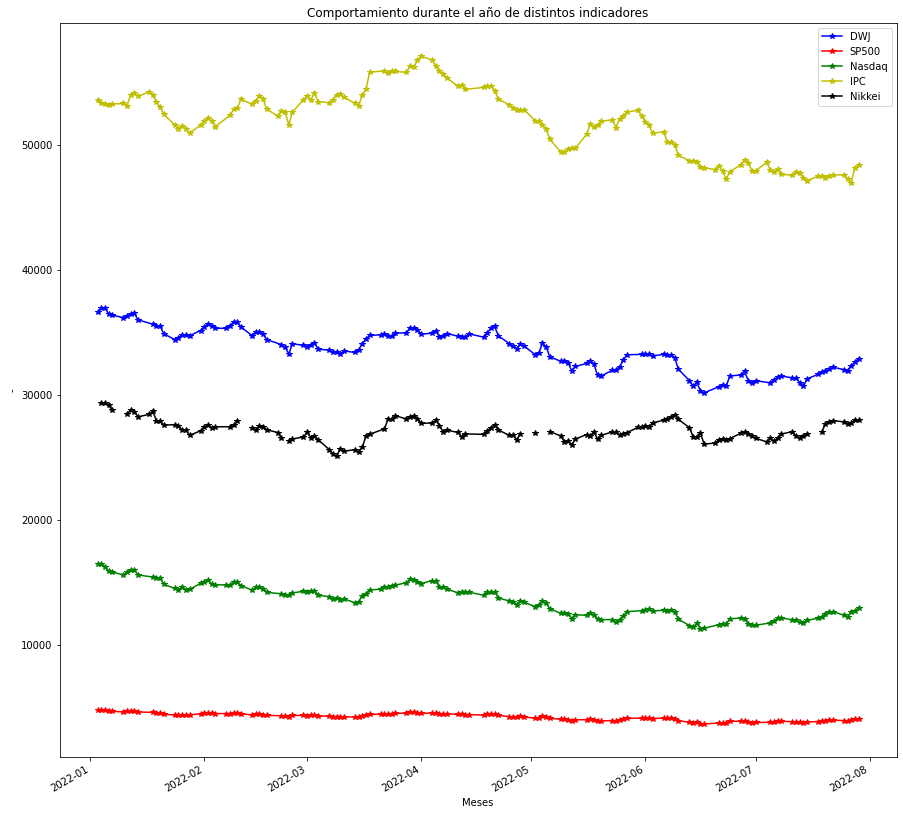

In [6]:
plt.figure(figsize=(15, 15))
DWJ_serie.plot(linestyle='-', marker='*', color='b')
SP500_serie.plot(linestyle='-', marker='*', color='r')
Nasdaq_serie.plot(linestyle='-', marker='*', color='g')
IPC_serie.plot(linestyle='-', marker='*', color='y')
Nikkei_serie.plot(linestyle='-', marker='*', color='black')
plt.legend(['DWJ','SP500','Nasdaq','IPC', "Nikkei"], loc=1)
plt.title('Comportamiento durante el año de distintos indicadores')
plt.ylabel('-')
plt.xlabel('Meses')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

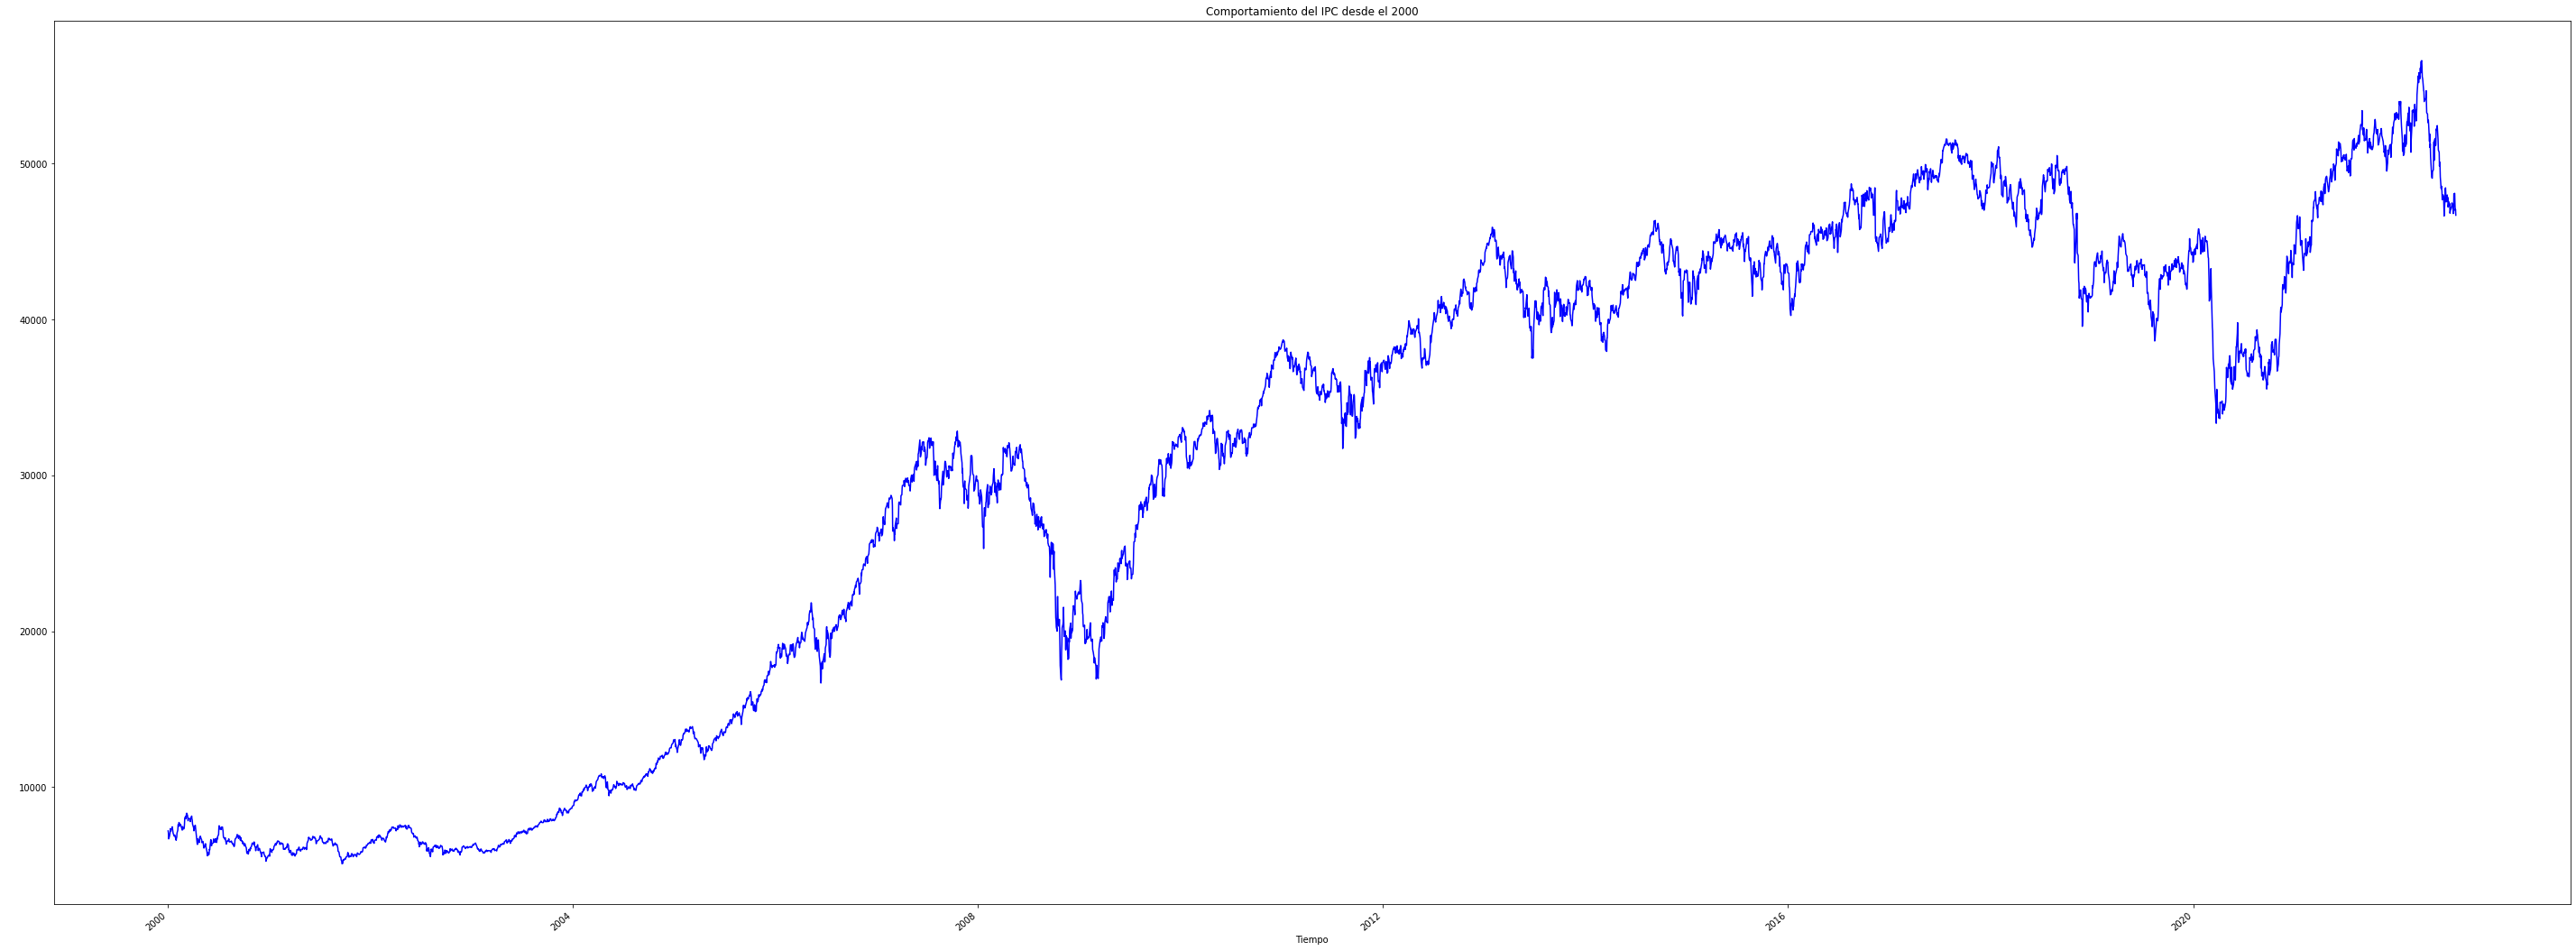

In [7]:
start = datetime.datetime(2000,1,1) 
end = datetime.datetime(2022,8,8) 

IPC = yf.Ticker('^MXX').history(start=start, end=end) #IPC (BMV)

plt.figure(figsize=(50, 20))
IPC['Open'].plot(color='b')
plt.title('Comportamiento del IPC desde el 2000')
plt.xlabel('Tiempo')
plt.ylabel(' ')
plt.xticks(rotation=40)

In [8]:
from sklearn.linear_model import LinearRegression

trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(IPC.index).reshape((-1,1)), IPC['Open'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
residuals = np.array(IPC['Open']) - trend_model.predict(np.array(IPC.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=IPC.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

NameError: name 'trend_model' is not defined

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

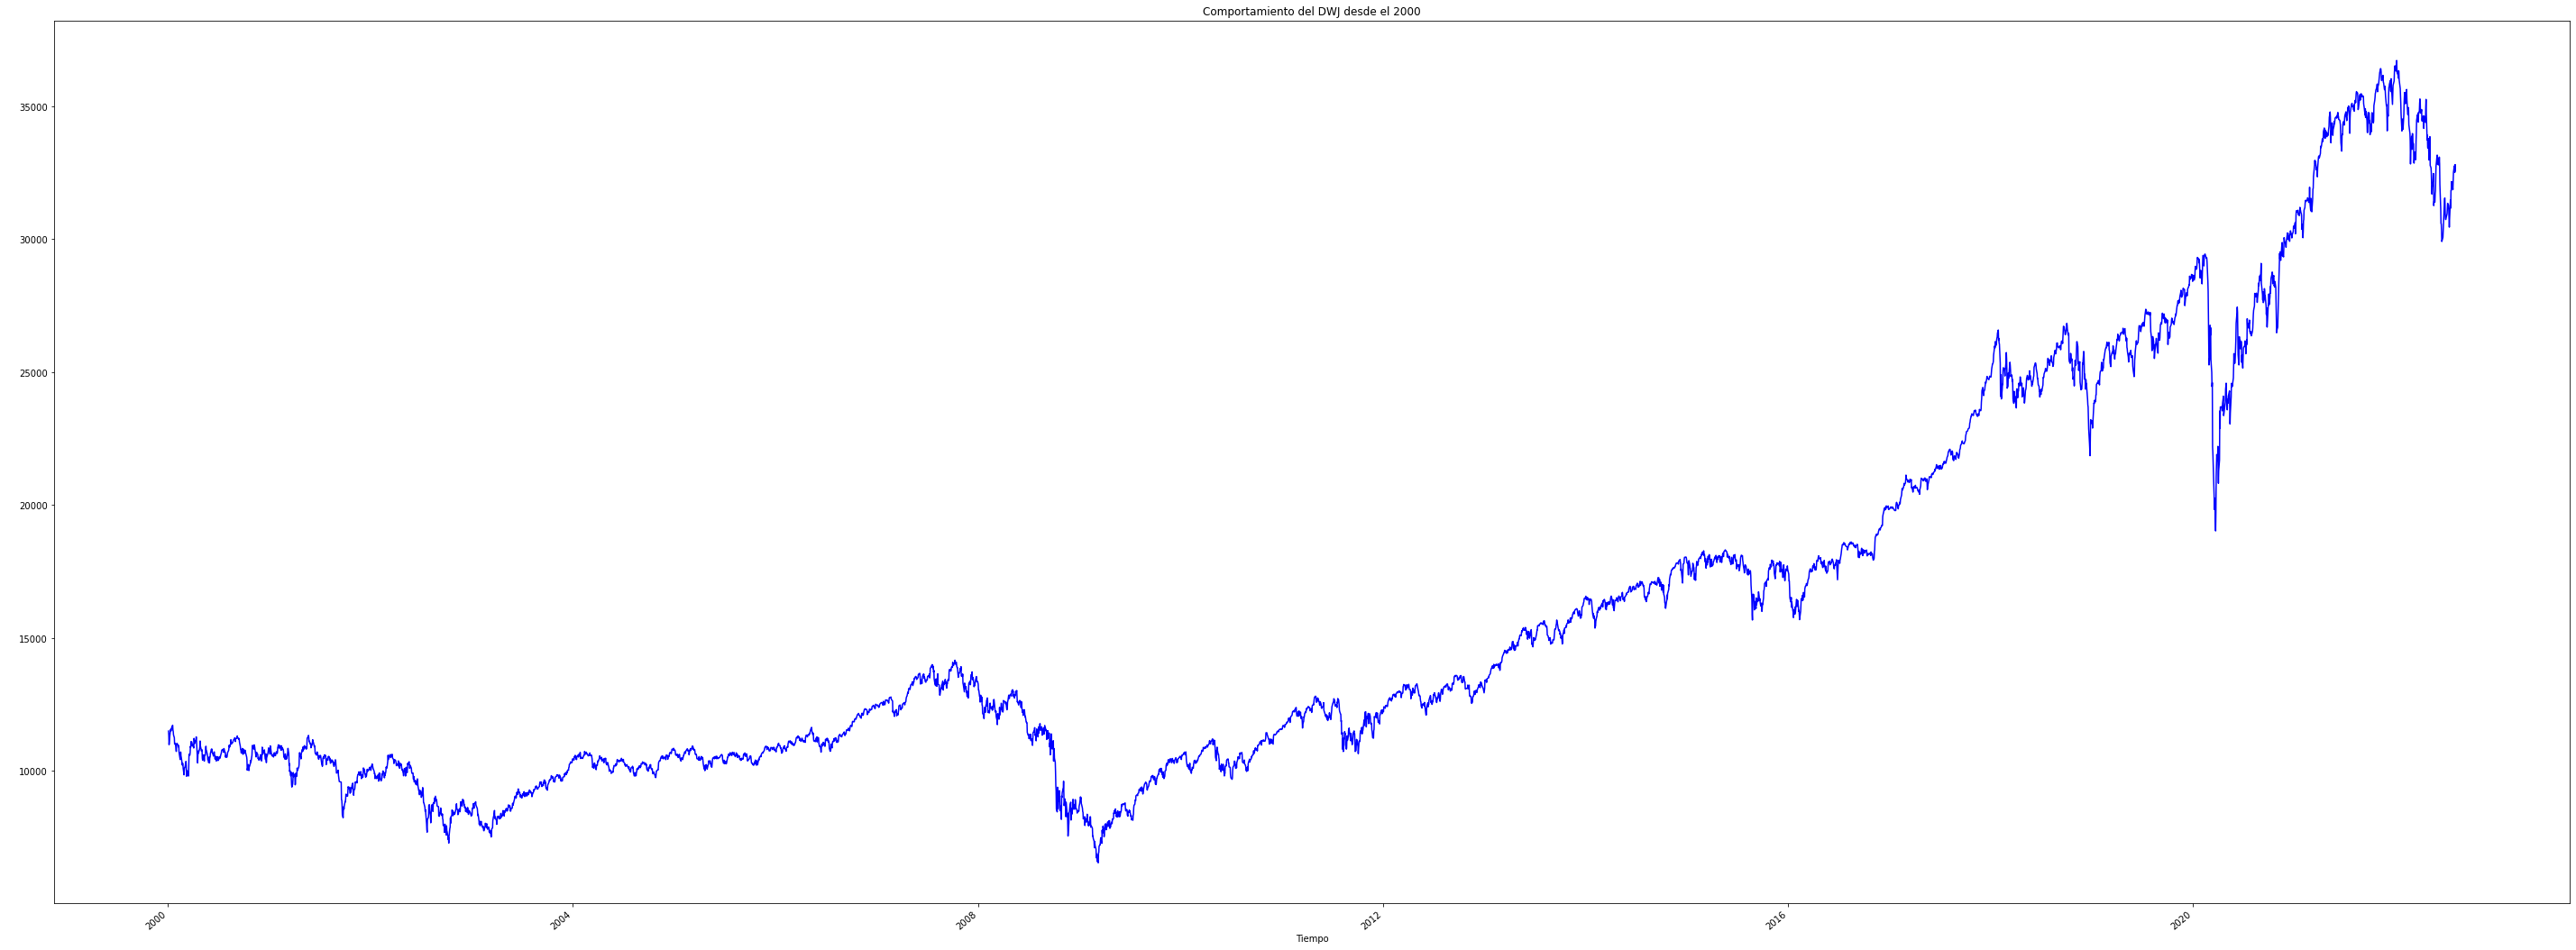

In [ ]:
start = datetime.datetime(2000,1,1) 
end = datetime.datetime(2022,8,8) 

DWJ = yf.Ticker('^DJI').history(start=start, end=end) #Dow Jones

plt.figure(figsize=(50, 20))
DWJ['Open'].plot(color='b')
plt.title('Comportamiento del DWJ desde el 2000')
plt.xlabel('Tiempo')
plt.ylabel(' ')
plt.xticks(rotation=40)

In [ ]:
import numpy as np
def ApEn(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [21]:
import EntropyHub as EH

Ap, Phi = EH.ApEn(IPC_serie,  m = 2, tau = 1)

print(Ap, Phi)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
Ap, Phi = EH.ApEn(IPC["High"].values,  m = 3, tau = 1)

print(Ap , Phi)

[2.12920994 0.60891013 0.59900361 0.50701756] [ 0.03413429 -2.09507565 -2.70398578 -3.30298939 -3.81000695]


In [22]:
import yfinance as yf
from pathlib import Path
from datetime import date, timedelta, datetime
import time

start = datetime.today().replace(hour = 0, minute = 0, second = 0 ) - timedelta(days= 5)
end = datetime.today().replace(hour = 23) - timedelta(days = 0)


Ap, Phi = EH.ApEn(yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values,  m = , tau = 2)

print(Ap , Phi)

[2.24160572 0.48073507 0.45139319 0.40596058] [ 0.0056465  -2.23595921 -2.71669429 -3.16808748 -3.57404806]


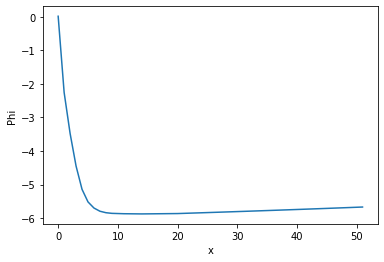

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,len(Phi),1)

plt.plot(x,Phi)
plt.xlabel('x')
plt.ylabel('Phi')
plt.show()

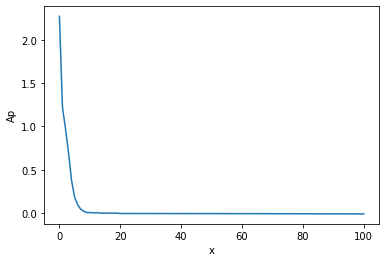

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,len(Ap),1)

plt.plot(x,Ap)
plt.xlabel('x')
plt.ylabel('Ap')
plt.show()

In [ ]:
Samp, A, B = EH.SampEn(yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values,  m = 3, tau = 2)

print(Samp, A, B)

[2.11003764 1.08066125 1.0851097  1.01558895] [9149. 3054. 1019.  364.] [75466.  8999.  3016.  1005.]


(51363.55, 51727.16875, 33518.7369140625, 33690.6419921875)

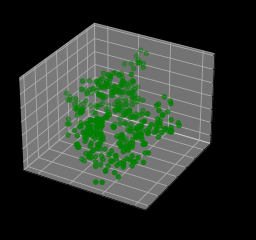

In [ ]:
from matplotlib.pyplot import figure, scatter, axis
fig = figure(facecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('k')
ax.scatter(yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values, yf.Ticker('^DJI').history(start=start, end=end, interval = '1m')['High'].values, yf.Ticker('^NDX').history(start=start, end=end, interval = '1m')['High'].values, c='g')
ax.axis('on')

In [ ]:
Perm, Pnorm, cPE = EH.PermEn(yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values, m = 3, tau = 2,
Typex = 'finegrain', tpx = 1.234, Logx = 10, Norm = False)

print(Perm, Pnorm, cPE)

[-0.          0.84733528  1.3406135 ] [       nan 0.84733528 0.67030675] [0.84733528 0.49327822]


(51363.55, 51727.16875, 33518.7369140625, 33690.6419921875)

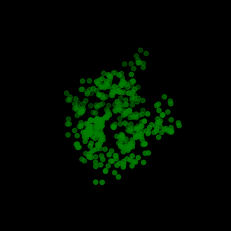

In [ ]:
from matplotlib.pyplot import figure, scatter, axis
fig = figure(facecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('k')
ax.scatter(yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values, yf.Ticker('^DJI').history(start=start, end=end, interval = '1m')['High'].values, yf.Ticker('^NDX').history(start=start, end=end, interval = '1m')['High'].values, c='g')
ax.axis('off')

In [ ]:
IPC_values = yf.Ticker('^MXX').history(start=start, end=end, interval = '1m')['High'].values
DWJ_values = yf.Ticker('^DJI').history(start=start, end=end, interval = '1m')['High'].values

IPC_values + D

array([51546.390625  , 51524.44921875, 51496.73046875, 51484.4296875 ,
       51565.25      , 51566.828125  , 51539.3203125 , 51504.37109375,
       51519.3515625 , 51521.0390625 , 51493.578125  , 51434.8984375 ,
       51445.78125   , 51466.1796875 , 51482.75      , 51497.48046875,
       51514.66015625, 51493.03125   , 51481.80078125, 51483.23828125,
       51477.46875   , 51492.51953125, 51510.16015625, 51528.578125  ,
       51514.2109375 , 51545.05859375, 51579.44140625, 51589.05859375,
       51661.46875   , 51645.6796875 , 51646.7109375 , 51647.921875  ,
       51648.328125  , 51662.578125  , 51676.8515625 , 51671.69921875,
       51671.78125   , 51662.66015625, 51648.55078125, 51636.26953125,
       51646.4296875 , 51659.421875  , 51664.5703125 , 51657.51171875,
       51601.328125  , 51609.53125   , 51604.19140625, 51602.12109375,
       51588.4609375 , 51585.9296875 , 51564.390625  , 51578.5703125 ,
       51602.37109375, 51593.640625  , 51592.859375  , 51564.8515625 ,
      

In [16]:
import os
os.chdir("C:/Users/aedmu/Desktop/Proyectos/Servicio_social/Datos/Info/IPC")
os.getcwd()

import csv
for i in range(11,30):
    f= open("IPC_2022-09-{day}.csv".format(day = i))
    reader = csv.reader(f)
    for row in reader:
        print (row[3])  

Low
Low
47124.62109375
47162.1796875
47142.05859375
47145.9609375
47185.859375
47185.859375
47223.83984375
47268.69140625
47255.1796875
47257.0
47254.76171875
47254.80859375
47251.578125
47264.1484375
47260.98828125
47281.51953125
47325.5
47369.4609375
47405.05859375
47424.421875
47457.12890625
47441.51953125
47448.62109375
47488.609375
47540.80078125
47539.25
47580.8984375
47611.2890625
47626.8203125
47628.6796875
47643.359375
47648.53125
47638.33984375
47626.41015625
47626.08984375
47646.94921875
47647.76953125
47652.01953125
47661.921875
47619.05078125
47612.87109375
47609.98046875
47622.37109375
47608.01171875
47607.7109375
47608.1484375
47625.96875
47634.609375
47647.19921875
47678.12890625
47709.109375
47712.80078125
47727.03125
47717.51953125
47719.2109375
47719.25
47768.51171875
47779.23828125
47777.62109375
47765.37109375
47767.078125
47770.12890625
47771.328125
47782.2109375
47782.73828125
47786.2890625
47777.66015625
47785.26953125
47804.2890625
47804.69921875
47807.921875
4

FileNotFoundError: [Errno 2] No such file or directory: 'IPC_2022-09-18.csv'